<a href="https://www.kaggle.com/code/sachinmaurya123/clustering-financial-ratios-2021?scriptVersionId=95335098" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank2020/BanksFinancialDataandRatio2020.csv
/kaggle/input/banks2020/BanksFinancialDataandRatio2020.csv
/kaggle/input/bank2021/BanksFinancialDataandRatio2021.csv


# 1. Import Libraries


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline
from scipy import stats

# 2. Loading Data

In [3]:
data = pd.read_csv('../input/bank2021/BanksFinancialDataandRatio2021.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Emiten  46 non-null     object 
 1   DER     46 non-null     float64
 2   ROA     46 non-null     float64
 3   NPM     46 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.6+ KB


In [4]:
data.describe()

,DER,ROA,NPM
count,46.000000,46.000000,46.000000
mean,5.156739,0.017609,0.301522
std,3.287448,0.023015,0.418988
min,0.080000,0.000000,0.000000
25%,2.907500,0.002500,0.072500
50%,5.150000,0.010000,0.175000
75%,6.550000,0.020000,0.370000
max,15.310000,0.110000,2.080000


In [5]:
display(data)

,Emiten,DER,ROA,NPM
0,BANK,0.08,0.03,2.08
1,AGRO,5.86,0.11,1.09
2,AGRS,5.41,0.01,0.12
3,AMAR,2.70,0.00,0.00
4,ARTO,0.48,0.01,0.13
5,BABP,6.13,0.00,0.02
6,BACA,12.28,0.00,0.03
7,BBCA,5.03,0.03,0.46
8,BBHI,2.57,0.02,0.20
9,BBKP,10.03,0.03,0.73


# 3. Scatter Plot

<Figure size 2160x2160 with 0 Axes>

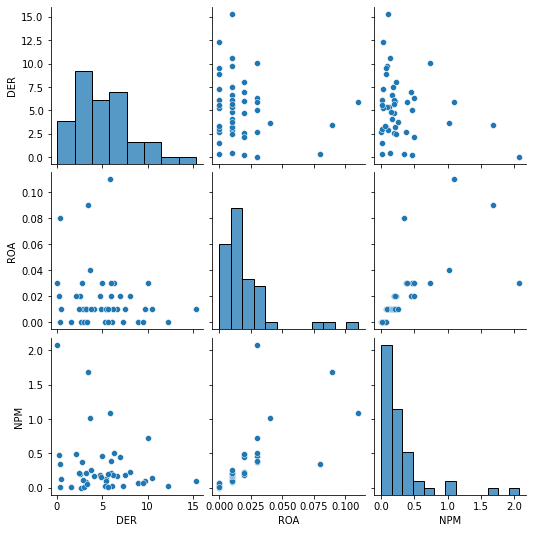

In [6]:
plt.figure(figsize=(30, 30))
sns.pairplot(data, vars = data.columns[1:6]);

Add new column into dataset

In [7]:
data["category"] = pd.NaT

In [8]:
data.describe()

,DER,ROA,NPM
count,46.000000,46.000000,46.000000
mean,5.156739,0.017609,0.301522
std,3.287448,0.023015,0.418988
min,0.080000,0.000000,0.000000
25%,2.907500,0.002500,0.072500
50%,5.150000,0.010000,0.175000
75%,6.550000,0.020000,0.370000
max,15.310000,0.110000,2.080000


In [9]:
data.head()

,Emiten,DER,ROA,NPM,category
0,BANK,0.08,0.03,2.08,NaT
1,AGRO,5.86,0.11,1.09,NaT
2,AGRS,5.41,0.01,0.12,NaT
3,AMAR,2.70,0.00,0.00,NaT
4,ARTO,0.48,0.01,0.13,NaT


# Scatter Plot

<AxesSubplot:xlabel='Emiten', ylabel='NPM'>

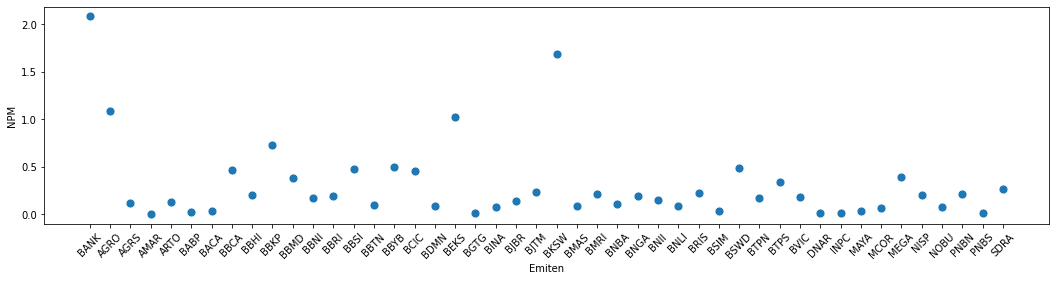

In [10]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emiten', y='NPM', 
                data=data, s=80)

<AxesSubplot:xlabel='Emiten', ylabel='DER'>

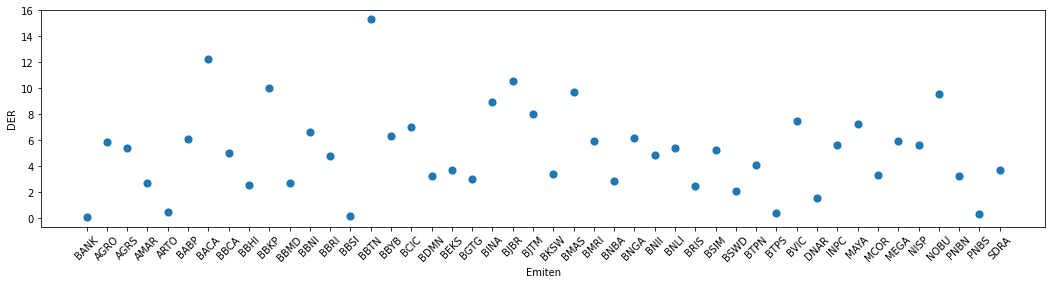

In [11]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emiten', y='DER', 
                data=data, s=80)

<AxesSubplot:xlabel='Emiten', ylabel='ROA'>

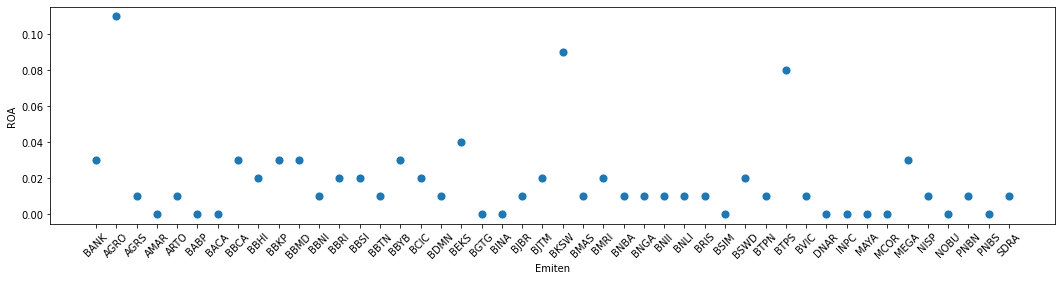

In [12]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emiten', y='ROA', 
                data=data, s=80)

# 3. Outlier

In [13]:
print(f'Number of rows before filtering outliers: {len(data)}')

filtered_entries = np.array([False] * len(data))
for col in ['DER']:
    zscore = abs(stats.zscore(data[col]))
    filtered_entries = (zscore < 3) | filtered_entries
    
data = data[filtered_entries]

print(f'Number of rows after filtering outliers: {len(data)}')

Number of rows before filtering outliers: 46
Number of rows after filtering outliers: 45


In [14]:
data.describe()

,DER,ROA,NPM
count,45.000000,45.000000,45.000000
mean,4.931111,0.017778,0.306000
std,2.942438,0.023247,0.422608
min,0.080000,0.000000,0.000000
25%,2.880000,0.000000,0.070000
50%,5.030000,0.010000,0.180000
75%,6.310000,0.020000,0.380000
max,12.280000,0.110000,2.080000


# 4. Normalization

In [15]:

feats = ['DER','ROA','NPM']
X = data[feats].values
y = data['category'].values

from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler().fit_transform(X)
new_dataframe = pd.DataFrame(data = standardscaler, columns = feats)
new_dataframe.describe()

,DER,ROA,NPM
count,4.500000e+01,4.500000e+01,4.500000e+01
mean,3.700743e-17,-8.635068e-18,1.511137e-17
std,1.011300e+00,1.011300e+00,1.011300e+00
min,-1.667300e+00,-7.733892e-01,-7.322577e-01
25%,-7.049556e-01,-7.733892e-01,-5.647478e-01
50%,3.398757e-02,-3.383578e-01,-3.015179e-01
75%,4.739165e-01,9.667365e-02,1.770819e-01
max,2.525773e+00,4.011956e+00,4.245180e+00


In [16]:
new_dataframe.head()

,DER,ROA,NPM
0,-1.667300,0.531705,4.245180
1,0.319254,4.011956,1.876111
2,0.164591,-0.338358,-0.445098
3,-0.766821,-0.773389,-0.732258
4,-1.529822,-0.338358,-0.421168


# 5. K-means Clustering

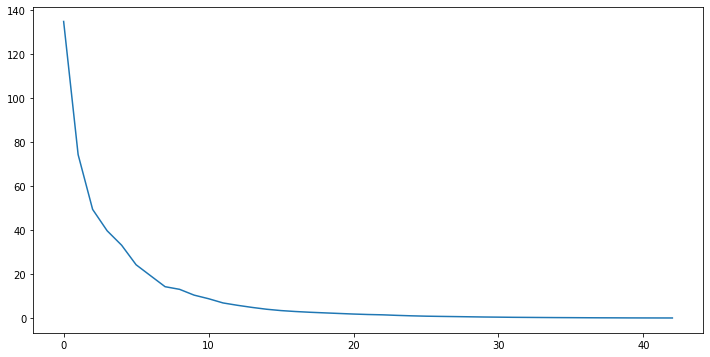

In [17]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 44):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(new_dataframe.values)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(inertia) #Elbow Method

Determine number of cluster

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, init='k-means++', max_iter=300, n_init=12, random_state=0)
kmeans.fit(new_dataframe.values)

KMeans(n_init=12, random_state=0)

In [19]:
new_dataframe['target'] = y
new_dataframe['fit'] = kmeans.labels_

# Plot Cluster

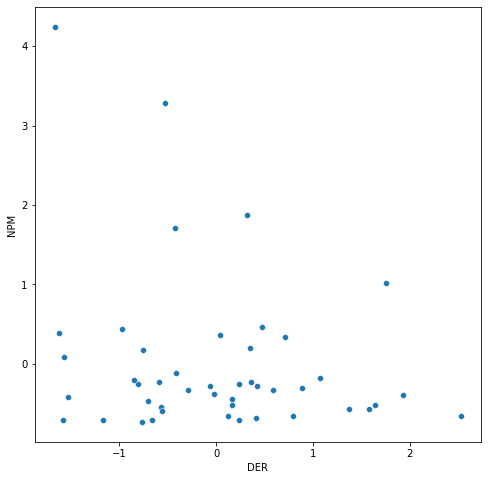

In [20]:
plt.rcParams["figure.figsize"] = (8, 8)
sns.scatterplot(x='DER', y='NPM', hue=new_dataframe.target.to_list(), data=new_dataframe);

In [21]:
new_dataframe.head(45)

,DER,ROA,NPM,target,fit
0,-1.667300,0.531705,4.245180,NaT,2
1,0.319254,4.011956,1.876111,NaT,1
2,0.164591,-0.338358,-0.445098,NaT,0
3,-0.766821,-0.773389,-0.732258,NaT,7
4,-1.529822,-0.338358,-0.421168,NaT,7
5,0.412052,-0.773389,-0.684398,NaT,0
6,2.525773,-0.773389,-0.660468,NaT,3
7,0.033988,0.531705,0.368522,NaT,6
8,-0.811501,0.096674,-0.253658,NaT,7
9,1.752460,0.531705,1.014632,NaT,6


In [22]:
new_dataframe.insert(0,"category",np.nan,True)
new_dataframe.loc[new_dataframe['fit'] == 0, 'category'] = 2
new_dataframe.loc[new_dataframe['fit'] == 1, 'category'] = 4
new_dataframe.loc[new_dataframe['fit'] == 2, 'category'] = 1
new_dataframe.loc[new_dataframe['fit'] == 3, 'category'] = 0
new_dataframe.loc[new_dataframe['fit'] == 4, 'category'] = 3
new_dataframe.loc[new_dataframe['fit'] == 5, 'category'] = 5
new_dataframe.loc[new_dataframe['fit'] == 6, 'category'] = 6
new_dataframe.loc[new_dataframe['fit'] == 7, 'category'] = 7
new_dataframe['category'] = new_dataframe['category'].astype(int)
new_dataframe.head(6)

,category,DER,ROA,NPM,target,fit
0,1,-1.667300,0.531705,4.245180,NaT,2
1,4,0.319254,4.011956,1.876111,NaT,1
2,2,0.164591,-0.338358,-0.445098,NaT,0
3,7,-0.766821,-0.773389,-0.732258,NaT,7
4,7,-1.529822,-0.338358,-0.421168,NaT,7
5,2,0.412052,-0.773389,-0.684398,NaT,0


# Adjust column name to (St.) = Standardized

In [23]:
new_dataframe.drop(["fit","target"], axis=1, inplace=True)
new_dataframe.columns = ['category', 'NPM (St.)','DER (St.)','ROA (St.)']
new_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   category   45 non-null     int64  
 1   NPM (St.)  45 non-null     float64
 2   DER (St.)  45 non-null     float64
 3   ROA (St.)  45 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.5 KB


# 3D Scatter Plot

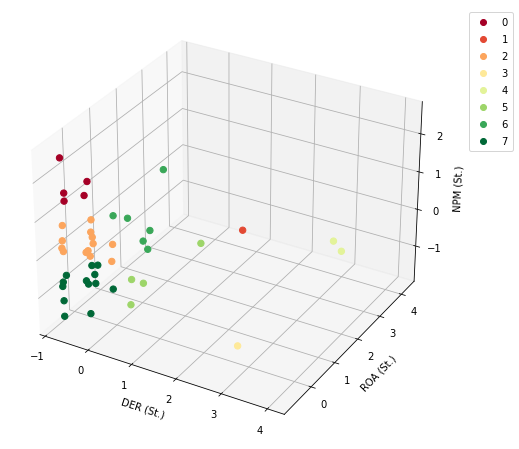

In [24]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')


x = new_dataframe['DER (St.)']
y = new_dataframe['ROA (St.)']
z = new_dataframe['NPM (St.)']

ax.set_xlabel("DER (St.)")
ax.set_ylabel("ROA (St.)")
ax.set_zlabel("NPM (St.)")

cmap = ListedColormap(sns.color_palette("RdYlGn", 256).as_hex())

sc = ax.scatter(x, y, z, s=40, c=new_dataframe['category'], marker='o', cmap=cmap, alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

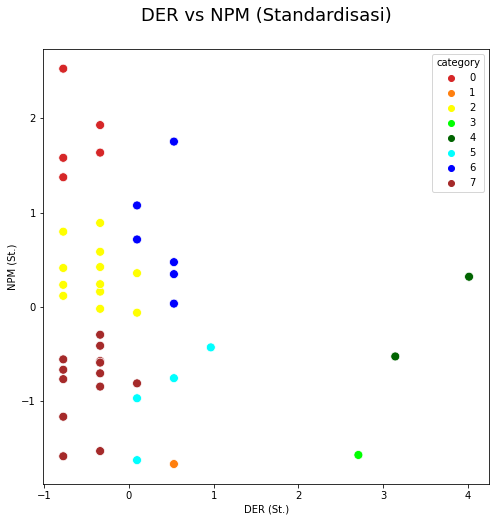

In [25]:
# color palette as dictionary
palette = {0:"tab:red",
           1:"tab:orange", 
           2:"yellow",
           3:"lime",
           4:"darkgreen",
          5:"cyan",
          6:"blue",
          7:"brown"}

sns.scatterplot(x='DER (St.)', y='NPM (St.)', 
                hue='category', data=new_dataframe, s=80,
                palette=palette)
plt.title("DER vs NPM (Standardisasi)", fontsize=18, y=1.05)
plt.show()

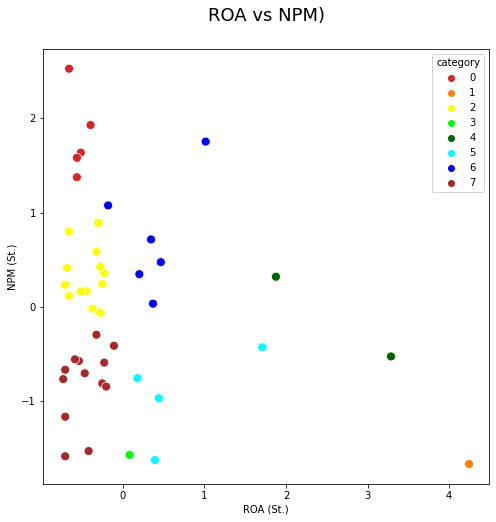

In [26]:
sns.scatterplot(x='ROA (St.)', y='NPM (St.)', 
                hue='category', data=new_dataframe, s=80,
                palette=palette)
plt.title("ROA vs NPM)", fontsize=18, y=1.05)
plt.show()

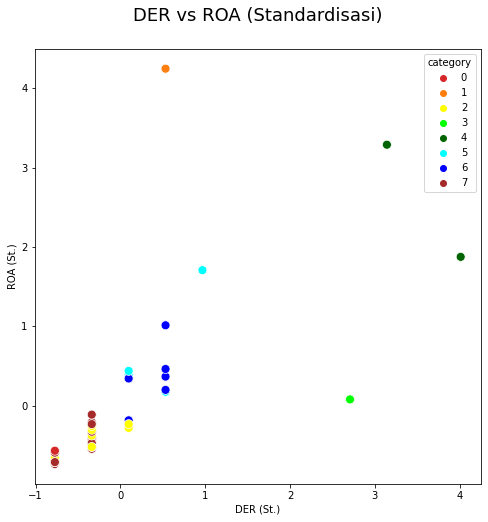

In [27]:
sns.scatterplot(x='DER (St.)', y='ROA (St.)', 
                hue='category', data=new_dataframe, s=80,
                palette=palette)
plt.title("DER vs ROA (Standardisasi)", fontsize=18, y=1.05)
plt.show()

In [28]:
display(data)

,Emiten,DER,ROA,NPM,category
0,BANK,0.08,0.03,2.08,NaT
1,AGRO,5.86,0.11,1.09,NaT
2,AGRS,5.41,0.01,0.12,NaT
3,AMAR,2.70,0.00,0.00,NaT
4,ARTO,0.48,0.01,0.13,NaT
5,BABP,6.13,0.00,0.02,NaT
6,BACA,12.28,0.00,0.03,NaT
7,BBCA,5.03,0.03,0.46,NaT
8,BBHI,2.57,0.02,0.20,NaT
9,BBKP,10.03,0.03,0.73,NaT


In [29]:
# drop these row indexes
# from dataFrame
index_names = data[ data['Emiten'] == 'BANK' ].index
data.drop(index_names, inplace = True)
data.reset_index(drop=True, inplace=True)
data.drop(["category"], axis=1, inplace=True)

In [30]:
dftemp = pd.read_csv('../input/bank2021/BanksFinancialDataandRatio2021.csv')
df = pd.concat([dftemp, new_dataframe, data], axis=1)
df.head(50)

,Emiten,DER,ROA,NPM,category,NPM (St.),DER (St.),ROA (St.),Emiten,DER,ROA,NPM
0,BANK,0.08,0.03,2.08,1.0,-1.667300,0.531705,4.245180,AGRO,5.86,0.11,1.09
1,AGRO,5.86,0.11,1.09,4.0,0.319254,4.011956,1.876111,AGRS,5.41,0.01,0.12
2,AGRS,5.41,0.01,0.12,2.0,0.164591,-0.338358,-0.445098,AMAR,2.70,0.00,0.00
3,AMAR,2.70,0.00,0.00,7.0,-0.766821,-0.773389,-0.732258,ARTO,0.48,0.01,0.13
4,ARTO,0.48,0.01,0.13,7.0,-1.529822,-0.338358,-0.421168,BABP,6.13,0.00,0.02
5,BABP,6.13,0.00,0.02,2.0,0.412052,-0.773389,-0.684398,BACA,12.28,0.00,0.03
6,BACA,12.28,0.00,0.03,0.0,2.525773,-0.773389,-0.660468,BBCA,5.03,0.03,0.46
7,BBCA,5.03,0.03,0.46,6.0,0.033988,0.531705,0.368522,BBHI,2.57,0.02,0.20
8,BBHI,2.57,0.02,0.20,7.0,-0.811501,0.096674,-0.253658,BBKP,10.03,0.03,0.73
9,BBKP,10.03,0.03,0.73,6.0,1.752460,0.531705,1.014632,BBMD,2.73,0.03,0.38


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Emiten     46 non-null     object 
 1   DER        46 non-null     float64
 2   ROA        46 non-null     float64
 3   NPM        46 non-null     float64
 4   category   45 non-null     float64
 5   NPM (St.)  45 non-null     float64
 6   DER (St.)  45 non-null     float64
 7   ROA (St.)  45 non-null     float64
 8   Emiten     44 non-null     object 
 9   DER        44 non-null     float64
 10  ROA        44 non-null     float64
 11  NPM        44 non-null     float64
dtypes: float64(10), object(2)
memory usage: 4.4+ KB


In [32]:
#df.to_csv('result.csv', index = False)
df.to_csv (r'D:\CQU MBA\MBA sessions\CQU\Sem 3\Financial Data Analytics\Assesment 2\export.csv', index = False, header=True)

In [33]:
kmeans.cluster_centers_

array([[ 0.33035798, -0.40528568, -0.4395755 ],
       [-0.10349023,  3.57692501,  2.58204586],
       [-1.66730022,  0.53170507,  4.24518013],
       [ 1.80882597, -0.59937662, -0.54081776],
       [-1.57106576,  2.70686217,  0.08136196],
       [-0.94554176,  0.42294721,  0.6796117 ],
       [ 0.73283305,  0.3866946 ,  0.36852184],
       [-0.80832834, -0.47221359, -0.46166472]])

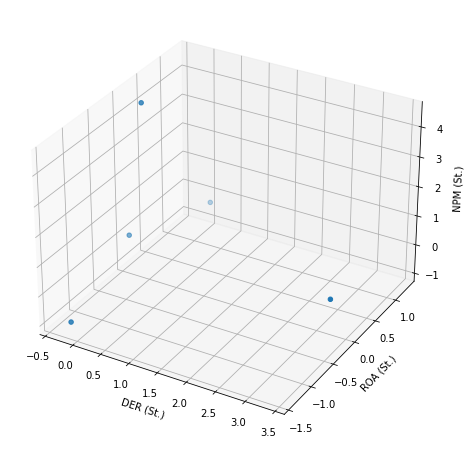

In [34]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
x = [0.07796577,3.3825386,-0.19978728,-0.22183117,-0.32525515]
y = [1.27721216,-0.22442569,-1.39490532,0.15549501,-0.03911061]
z = [-0.22773712,0.35006475,-0.89274149,4.44060221,0.14030381]

ax.set_xlabel("DER (St.)")
ax.set_ylabel("ROA (St.)")
ax.set_zlabel("NPM (St.)")
ax.scatter(x, y, z)
plt.show()

In [35]:
df[df['category'] == 7].describe() 
#Positively Impacted

,DER,ROA,NPM,category,NPM (St.),DER (St.),ROA (St.),DER,ROA,NPM
count,13.000000,13.000000,13.000000,13.0,13.000000,13.000000,13.000000,12.000000,12.000000,12.000000
mean,4.442308,0.012308,0.237692,7.0,-0.808328,-0.472214,-0.461665,4.720000,0.017500,0.266667
std,2.884699,0.011658,0.279886,0.0,0.394609,0.274255,0.220707,3.176244,0.024168,0.318329
min,0.320000,0.000000,0.000000,7.0,-1.584814,-0.773389,-0.732258,0.320000,0.000000,0.010000
25%,2.570000,0.000000,0.070000,7.0,-0.845870,-0.773389,-0.708328,2.880000,0.000000,0.027500
50%,3.680000,0.010000,0.180000,7.0,-0.704956,-0.338358,-0.469028,5.440000,0.010000,0.160000
75%,7.010000,0.020000,0.210000,7.0,-0.574352,-0.338358,-0.253658,6.137500,0.030000,0.352500
max,9.530000,0.040000,1.020000,7.0,-0.295959,0.096674,-0.110078,10.030000,0.080000,1.020000


In [36]:
df[df['category'] == 6].describe() 
#Highly Positively Impacted

,DER,ROA,NPM,category,NPM (St.),DER (St.),ROA (St.),DER,ROA,NPM
count,6.000000,6.000000,6.000000,6.0,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,8.421667,0.018333,0.331667,6.0,0.732833,0.386695,0.368522,4.100000,0.030000,0.498333
std,4.395791,0.013292,0.271176,0.0,0.610213,0.224649,0.389405,1.801244,0.030332,0.594253
min,3.310000,0.000000,0.060000,6.0,0.033988,0.096674,-0.181868,2.570000,0.010000,0.080000
25%,5.350000,0.010000,0.110000,6.0,0.378541,0.205432,0.236907,2.862500,0.012500,0.200000
50%,8.170000,0.020000,0.300000,6.0,0.594210,0.531705,0.356557,3.330000,0.020000,0.290000
75%,10.412500,0.030000,0.490000,6.0,0.985162,0.531705,0.440312,5.072500,0.027500,0.432500
max,15.310000,0.030000,0.730000,6.0,1.752460,0.531705,1.014632,7.010000,0.090000,1.680000


In [37]:
df[df['category'] == 5].describe() 
#Negatively Impacted

,DER,ROA,NPM,category,NPM (St.),DER (St.),ROA (St.),DER,ROA,NPM
count,4.000000,4.00000,4.000000,4.0,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,2.865000,0.01500,0.240000,5.0,-0.945542,0.422947,0.679612,5.000000,0.012500,0.212500
std,2.086504,0.01291,0.217715,0.0,0.505040,0.416511,0.695481,1.758598,0.012583,0.205973
min,0.200000,0.00000,0.030000,5.0,-1.626057,0.096674,0.177082,2.990000,0.000000,0.010000
25%,2.097500,0.00750,0.067500,5.0,-1.133715,0.096674,0.338609,3.800000,0.007500,0.130000
50%,2.995000,0.01500,0.230000,5.0,-0.863055,0.314189,0.416382,5.190000,0.010000,0.170000
75%,3.762500,0.02250,0.402500,5.0,-0.674882,0.640463,0.757384,6.390000,0.015000,0.252500
max,5.270000,0.03000,0.470000,5.0,-0.430000,0.966736,1.708601,6.630000,0.030000,0.500000


In [38]:
#Worse Impacted
df[df['category'] == 4].describe() 

,DER,ROA,NPM,category,NPM (St.),DER (St.),ROA (St.),DER,ROA,NPM
count,2.000000,2.00000,2.000000,2.0,2.000000,2.000000,2.000000,2.000000,2.00,2.000000
mean,6.960000,0.06500,0.660000,4.0,-0.103490,3.576925,2.582046,7.550000,0.01,0.105000
std,1.555635,0.06364,0.608112,0.0,0.597851,0.615227,0.998342,3.026417,0.00,0.021213
min,5.860000,0.02000,0.230000,4.0,-0.526234,3.141894,1.876111,5.410000,0.01,0.090000
25%,6.410000,0.04250,0.445000,4.0,-0.314862,3.359409,2.229079,6.480000,0.01,0.097500
50%,6.960000,0.06500,0.660000,4.0,-0.103490,3.576925,2.582046,7.550000,0.01,0.105000
75%,7.510000,0.08750,0.875000,4.0,0.107882,3.794441,2.935013,8.620000,0.01,0.112500
max,8.060000,0.11000,1.090000,4.0,0.319254,4.011956,3.287981,9.690000,0.01,0.120000


In [39]:
#Very Negatively Impacted
df[df['category'] == 3].describe()

,DER,ROA,NPM,category,NPM (St.),DER (St.),ROA (St.),DER,ROA,NPM
count,1.00,1.00,1.00,1.0,1.000000,1.000000,1.000000,1.00,1.00,1.00
mean,4.07,0.01,0.17,3.0,-1.571066,2.706862,0.081362,7.52,0.01,0.18
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4.07,0.01,0.17,3.0,-1.571066,2.706862,0.081362,7.52,0.01,0.18
25%,4.07,0.01,0.17,3.0,-1.571066,2.706862,0.081362,7.52,0.01,0.18
50%,4.07,0.01,0.17,3.0,-1.571066,2.706862,0.081362,7.52,0.01,0.18
75%,4.07,0.01,0.17,3.0,-1.571066,2.706862,0.081362,7.52,0.01,0.18
max,4.07,0.01,0.17,3.0,-1.571066,2.706862,0.081362,7.52,0.01,0.18


In [40]:
#Highly Negative Impacted
df[df['category'] == 2].describe()

,DER,ROA,NPM,category,NPM (St.),DER (St.),ROA (St.),DER,ROA,NPM
count,13.000000,13.000000,13.000000,13.0,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,4.803077,0.015385,0.154615,2.0,0.330358,-0.405286,-0.439575,4.560769,0.007692,0.147692
std,2.460879,0.021062,0.116948,0.0,0.289803,0.299622,0.183330,3.399979,0.008321,0.162026
min,0.360000,0.000000,0.010000,2.0,-0.062247,-0.773389,-0.708328,0.200000,0.000000,0.000000
25%,2.880000,0.010000,0.090000,2.0,0.161155,-0.773389,-0.660468,2.470000,0.000000,0.030000
50%,5.410000,0.010000,0.150000,2.0,0.240204,-0.338358,-0.373308,3.310000,0.010000,0.090000
75%,6.130000,0.010000,0.190000,2.0,0.422362,-0.338358,-0.277588,5.400000,0.010000,0.190000
max,9.690000,0.080000,0.390000,2.0,0.889787,0.096674,-0.229728,12.280000,0.020000,0.490000


In [41]:
#Very Highly postively Impacted
df[df['category'] == 1].describe()

,DER,ROA,NPM,category,NPM (St.),DER (St.),ROA (St.),DER,ROA,NPM
count,1.00,1.00,1.00,1.0,1.0000,1.000000,1.00000,1.00,1.00,1.00
mean,0.08,0.03,2.08,1.0,-1.6673,0.531705,4.24518,5.86,0.11,1.09
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.08,0.03,2.08,1.0,-1.6673,0.531705,4.24518,5.86,0.11,1.09
25%,0.08,0.03,2.08,1.0,-1.6673,0.531705,4.24518,5.86,0.11,1.09
50%,0.08,0.03,2.08,1.0,-1.6673,0.531705,4.24518,5.86,0.11,1.09
75%,0.08,0.03,2.08,1.0,-1.6673,0.531705,4.24518,5.86,0.11,1.09
max,0.08,0.03,2.08,1.0,-1.6673,0.531705,4.24518,5.86,0.11,1.09


In [42]:
#Neutral Impacted
df[df['category'] == 0].describe()

,DER,ROA,NPM,category,NPM (St.),DER (St.),ROA (St.),DER,ROA,NPM
count,5.000000,5.00000,5.000000,5.0,5.000000,5.000000,5.000000,5.00000,5.000000,5.00000
mean,6.646000,0.02000,0.398000,0.0,1.808826,-0.599377,-0.540818,6.56200,0.018000,0.25000
std,3.933628,0.03937,0.720465,0.0,0.446926,0.238277,0.095720,2.82851,0.008367,0.12227
min,2.990000,0.00000,0.010000,0.0,1.374396,-0.773389,-0.660468,3.21000,0.010000,0.14000
25%,3.400000,0.00000,0.030000,0.0,1.580613,-0.773389,-0.564748,5.03000,0.010000,0.21000
50%,5.630000,0.00000,0.070000,0.0,1.635604,-0.773389,-0.564748,5.97000,0.020000,0.21000
75%,8.930000,0.01000,0.200000,0.0,1.927744,-0.338358,-0.516888,8.06000,0.020000,0.23000
max,12.280000,0.09000,1.680000,0.0,2.525773,-0.338358,-0.397238,10.54000,0.030000,0.46000
